## GRIP: The Sparks Foundation

### Data Science and Business Analytic Intern

### Author: Maksuda Rahman Fariya

### Task-1 : Prediction using Supervised ML

##### In this task we have to perdict percentage score based on the number of hours studied.The task has two variables where the feature is the number of hours studied and the terget value is the percentage score .That can be solved using linear regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading Data from remote url

In [2]:
data = pd.read_csv("http://bit.ly/w-data")

### Exploring Data

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


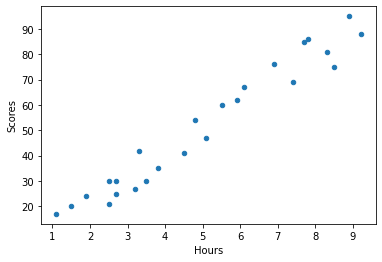

In [10]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [11]:
hours = data['Hours']
scores = data['Scores']

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

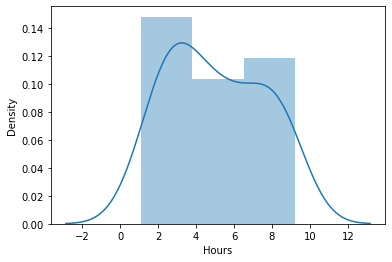

In [12]:
sns.distplot(hours)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

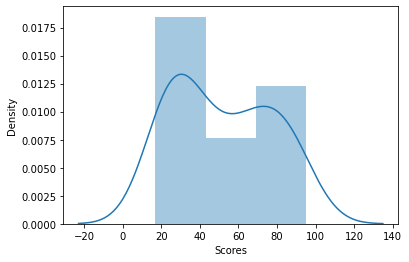

In [13]:
sns.distplot(scores)

In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=100)

In [17]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

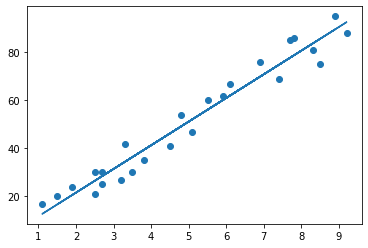

In [18]:
m = reg.coef_
c = reg.intercept_
line = m*X + c
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [20]:
y_pred = reg.predict(X_test)

In [21]:
actual_pred = pd.DataFrame({'target':y_test,'predict':y_pred})
actual_pred

,target,predict
0,25,28.477237
1,35,39.316855
2,42,34.389756
3,62,60.010669
4,20,16.652200
5,69,74.791966
6,76,69.864867


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


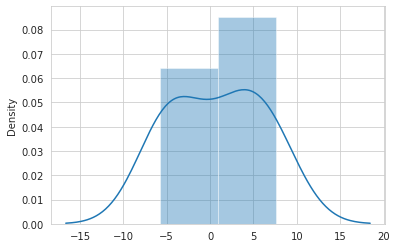

In [22]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

#### what will be the predicted value if a student studies for 9.25 hours/day??

In [24]:
h=9.25
s = reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score  {} % in exam ." .format(h,s))

If a student studies for 9.25 hours per day he/she will score  [93.02223095] % in exam .


### Model Evaluation

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))

Mean Absolute Error:  4.666937869822484
R2 Score 0.9403157736545141
